In [15]:
import requests, zipfile, io
import numpy as np
import pandas as pd
import time
#from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
from io import BytesIO
import random
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


In [18]:
feats = np.load('featurized_data.npy')
print(feats.shape)

y0 = np.load('y0.npy')
print(y0.shape)

(600, 1200)
(600, 8)


In [33]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(feats)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 600 samples in 0.001s...
[t-SNE] Computed neighbors for 600 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 600 / 600
[t-SNE] Mean sigma: 6.445969
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.738297
[t-SNE] KL divergence after 300 iterations: 1.435961
t-SNE done! Time elapsed: 0.5259442329406738 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

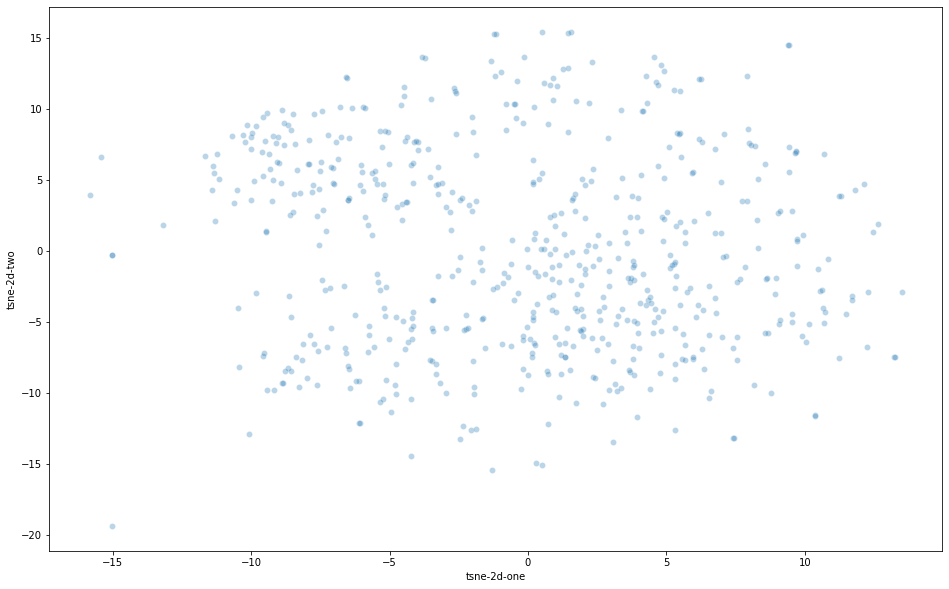

In [34]:
features = {}
features['tsne-2d-one'] = tsne_results[:,0]
features['tsne-2d-two'] = tsne_results[:,1]


plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y0",
    palette=sns.color_palette("hls", 10),
    data=features,
    legend="full",
    alpha=0.3
)

In [27]:
featsTMC = np.load('TMC-TSNE.npy')
featsConvex = np.load('ConvexTSNE.npy')

In [28]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(featsTMC)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 74 nearest neighbors...
[t-SNE] Indexed 75 samples in 0.000s...
[t-SNE] Computed neighbors for 75 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 75 / 75
[t-SNE] Mean sigma: 10.161213
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.306248
[t-SNE] KL divergence after 300 iterations: 1.091358
t-SNE done! Time elapsed: 0.18372678756713867 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

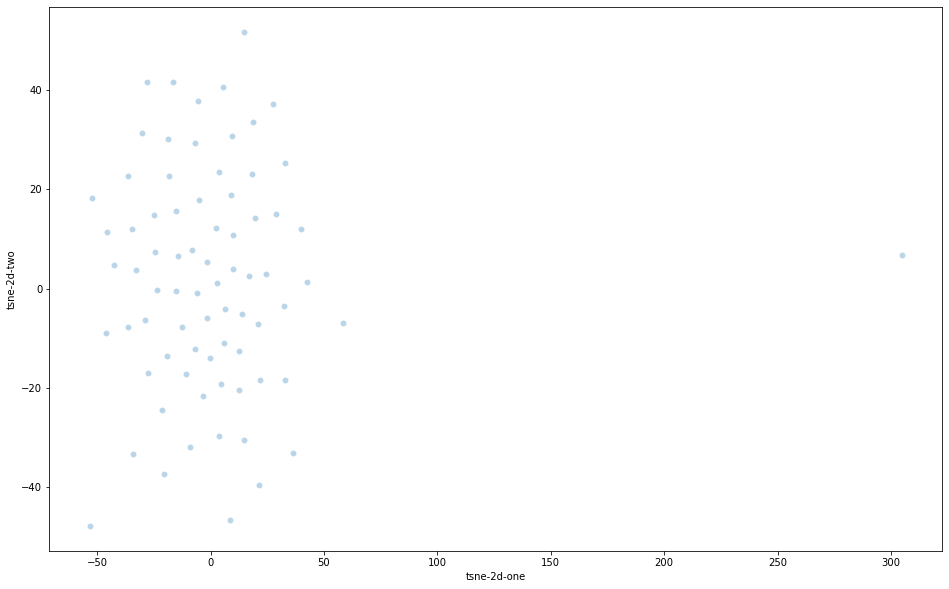

In [29]:
features = {}
features['tsne-2d-one'] = tsne_results[:,0]
features['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y0",
    palette=sns.color_palette("hls", 10),
    data=features,
    legend="full",
    alpha=0.3
)

In [30]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(featsConvex)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 74 nearest neighbors...
[t-SNE] Indexed 75 samples in 0.000s...
[t-SNE] Computed neighbors for 75 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 75 / 75
[t-SNE] Mean sigma: 11.932894
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.999191
[t-SNE] KL divergence after 300 iterations: 0.937266
t-SNE done! Time elapsed: 0.18656134605407715 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

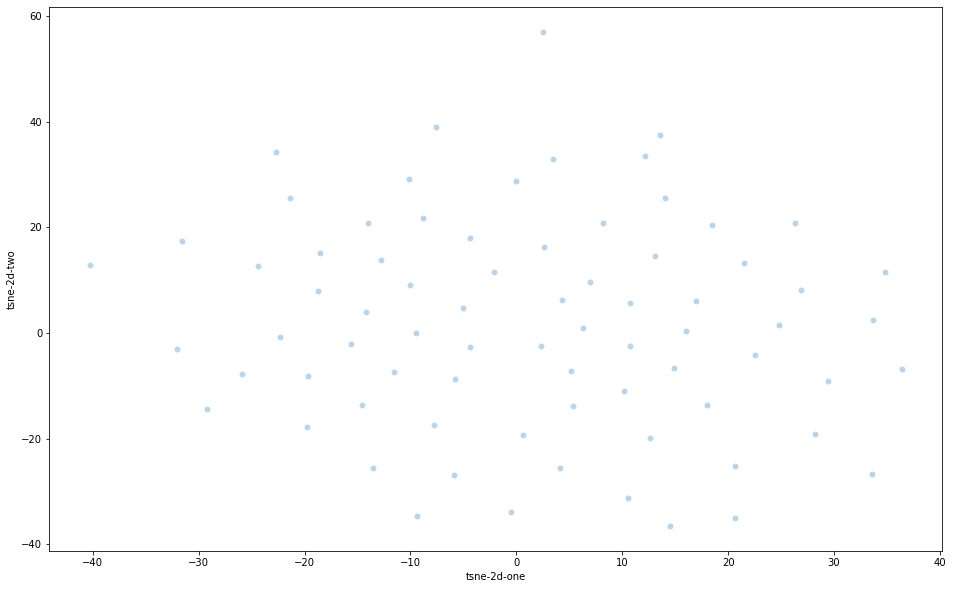

In [31]:
features = {}
features['tsne-2d-one'] = tsne_results[:,0]
features['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y0",
    palette=sns.color_palette("hls", 10),
    data=features,
    legend="full",
    alpha=0.3
)

In [35]:

tsne_results.shape

(600, 2)

In [37]:
def get_train(x, y, lst = [1,3,6]):
    outx = []
    outy = []
    for i in lst:
        outx.append(x[i])
        outy.append(y[i])
        
    return np.asarray(outx), np.asarray(outy)

In [42]:
tmcindex = np.load('TopIndicesTMC.npy')
outTMC, _ = get_train(tsne_results, np.zeros((600,)), tmcindex[:75])

In [43]:
outTMC

array([[ -5.900483  ,   2.4438407 ],
       [ -9.09998   ,   7.620078  ],
       [ -8.134643  ,  -6.522011  ],
       [ -2.6124332 ,  11.180066  ],
       [ -3.5285594 ,   5.216274  ],
       [  6.2888737 ,   7.7247667 ],
       [ -7.966289  ,  -8.937202  ],
       [  0.2319885 ,  -6.477657  ],
       [  0.2931696 , -14.920666  ],
       [  5.310548  ,  -5.409792  ],
       [ -5.1791525 ,  -4.539452  ],
       [  3.578003  ,   0.5964835 ],
       [ -6.8683357 ,   6.484011  ],
       [  0.17872587,  -4.6030855 ],
       [  0.1704991 ,  -4.838231  ],
       [  2.2091823 ,  10.427505  ],
       [  8.913755  ,  -2.9932554 ],
       [ -5.7650957 ,   1.8920109 ],
       [  5.348268  ,  -1.7568032 ],
       [ -5.2448125 ,   4.7334924 ],
       [  1.9789518 ,  -5.473276  ],
       [  1.2768931 ,  12.845454  ],
       [  2.5229642 ,   1.1286616 ],
       [ -9.210058  ,   8.115303  ],
       [  1.4319103 ,  12.911771  ],
       [ -4.7486105 , -10.0276785 ],
       [ -5.7548404 ,  -5.2280765 ],
 

In [49]:
def next_one_75(index):
    for i in range(index + 1, 600):
        if mask75[i] == 1:
            return i
def maskToInd(mask):
    ls = []
    index = -1
    for i in range(75):
        index = next_one_75(index)
        ls.append(index)
    return ls
        

In [50]:
mask75 = np.load('ConvexMask.npy')

indx_list= maskToInd(mask75)

print(len(indx_list))


75


In [51]:
outConvex, _ = get_train(tsne_results, np.zeros((600,)), indx_list)
outConvex

array([[  5.2710824 ,  11.36018   ],
       [ -3.3211808 ,  -7.9065065 ],
       [  4.566881  ,  13.722959  ],
       [  8.794453  ,  -9.96207   ],
       [  0.50752497, -15.028736  ],
       [  7.9491987 ,   8.631599  ],
       [-11.339049  ,   5.546332  ],
       [ -7.626627  ,  -9.427045  ],
       [ -1.1581593 ,  15.329228  ],
       [ -2.65869   ,  11.510419  ],
       [  2.901282  ,   7.9821734 ],
       [ -6.0663033 , -12.080231  ],
       [ 12.268057  ,  -2.8692927 ],
       [ -9.411953  ,   9.769808  ],
       [  9.409931  ,  14.552774  ],
       [  5.923906  ,   5.5498433 ],
       [-15.8196945 ,   3.9607563 ],
       [ 13.225377  ,  -7.4108753 ],
       [ 13.24129   ,  -7.4135814 ],
       [ 12.24941   ,  -6.7038465 ],
       [  9.535752  ,   2.8165567 ],
       [  2.2091823 ,  10.427505  ],
       [  7.4176164 , -13.146453  ],
       [ 10.682192  ,   6.888245  ],
       [  0.5136046 ,  15.457644  ],
       [  4.6181097 ,  11.914835  ],
       [  6.238116  ,  12.119723  ],
 

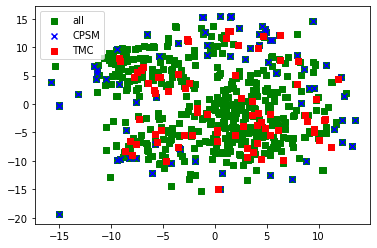

<Figure size 432x288 with 0 Axes>

In [58]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], c='g', marker='s', label='all')
plt.scatter(outConvex[:,0], outConvex[:,1], c='b', marker='x', label='CPSM')
plt.scatter(outTMC[:,0], outTMC[:,1], c='r', marker='s', label='TMC')
plt.legend(loc='upper left')
plt.show()
plt.savefig('tSNE.png')